# Biodiversity in National Parks

## Goals
- Calculate the number of animals with different degrees of endangerment.
- Visualization

## Calculations

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

# Load two csv as dataframes

observations = pd.read_csv("observations.csv")
species = pd.read_csv("species_info.csv")
species.set_index('scientific_name')
print(species)


# Add species info to observations
observations['common_name']= [species.loc[species.scientific_name==i].common_names.values[0] for i in observations.scientific_name]
observations['category']= [species.loc[species.scientific_name==i].category.values[0] for i in observations.scientific_name]                                                                    
observations['conservation_status']= [species.loc[species.scientific_name==i].conservation_status.values[0] for i in observations.scientific_name] 
print(observations.head())




            category                scientific_name  \
0             Mammal  Clethrionomys gapperi gapperi   
1             Mammal                      Bos bison   
2             Mammal                     Bos taurus   
3             Mammal                     Ovis aries   
4             Mammal                 Cervus elaphus   
...              ...                            ...   
5819  Vascular Plant               Solanum parishii   
5820  Vascular Plant                  Solanum xanti   
5821  Vascular Plant         Parthenocissus vitacea   
5822  Vascular Plant              Vitis californica   
5823  Vascular Plant            Tribulus terrestris   

                                           common_names conservation_status  
0                              Gapper's Red-Backed Vole                 NaN  
1                                 American Bison, Bison                 NaN  
2     Aurochs, Aurochs, Domestic Cattle (Feral), Dom...                 NaN  
3     Domestic Sheep, Moufl

In [2]:
# print distinct values of 'category' and 'conservation_status' of observations
print(observations.category.unique())
print(observations.conservation_status.unique())

['Vascular Plant' 'Mammal' 'Bird' 'Nonvascular Plant' 'Amphibian'
 'Reptile' 'Fish']
[nan 'Species of Concern' 'Endangered' 'Threatened' 'In Recovery']


In [3]:
# data summary
print('Data summary')
print(observations.count())

# missing data summary
print('\nMissing data percentage')
print((1-observations.count()/observations.scientific_name.count())*100)

Data summary
scientific_name        23296
park_name              23296
observations           23296
common_name            23296
category               23296
conservation_status      760
dtype: int64

Missing data percentage
scientific_name         0.000000
park_name               0.000000
observations            0.000000
common_name             0.000000
category                0.000000
conservation_status    96.737637
dtype: float64


In [4]:
observations_adjusted = observations.fillna('No Concern')
print(observations_adjusted)

                               scientific_name  \
0                           Vicia benghalensis   
1                               Neovison vison   
2                            Prunus subcordata   
3                         Abutilon theophrasti   
4                     Githopsis specularioides   
...                                        ...   
23291                     Croton monanthogynus   
23292                 Otospermophilus beecheyi   
23293  Heterotheca sessiliflora ssp. echioides   
23294                     Dicranella rufescens   
23295                           Cucurbita pepo   

                                 park_name  observations  \
0      Great Smoky Mountains National Park            68   
1      Great Smoky Mountains National Park            77   
2                   Yosemite National Park           138   
3                      Bryce National Park            84   
4      Great Smoky Mountains National Park            85   
...                                    

In [53]:
print(observations_adjusted.groupby('conservation_status').observations.sum().sort_values())


conservation_status
In Recovery              1392
Threatened               2526
Endangered               2798
Species of Concern      82579
No Concern            3225444
Name: observations, dtype: int64


In [6]:
summary = observations_adjusted.groupby(['conservation_status','category']).observations.sum()
print(summary)

conservation_status  category         
Endangered           Amphibian                144
                     Bird                     574
                     Fish                     455
                     Mammal                  1463
                     Vascular Plant           162
In Recovery          Bird                    1392
No Concern           Amphibian              41219
                     Bird                  254225
                     Fish                   67422
                     Mammal                100247
                     Nonvascular Plant     187948
                     Reptile                42142
                     Vascular Plant       2532241
Species of Concern   Amphibian               2044
                     Bird                   36642
                     Fish                    2109
                     Mammal                 14408
                     Nonvascular Plant       2705
                     Reptile                 2536
           

In [84]:
summary_pivot = observations_adjusted.pivot_table(index='category', columns='conservation_status', values='observations', aggfunc='sum')
column_order = ['Endangered','In Recovery','Species of Concern','Threatened','No Concern']
summary_pivot = summary_pivot.reindex(column_order, axis=1)
summary_pivot=summary_pivot.fillna(0)
summary_pivot['Total observations'] = summary_pivot['Endangered']+summary_pivot['In Recovery']+summary_pivot['Species of Concern']+summary_pivot['Threatened']+summary_pivot['No Concern']
summary_pivot=summary_pivot.sort_values(by=['Total observations'], ascending=False)
summary_pivot

conservation_status,Endangered,In Recovery,Species of Concern,Threatened,No Concern,Total observations
category,,,,,,
Vascular Plant,162.0,0.0,22135.0,552.0,2532241.0,2555090.0
Bird,574.0,1392.0,36642.0,0.0,254225.0,292833.0
Nonvascular Plant,0.0,0.0,2705.0,0.0,187948.0,190653.0
Mammal,1463.0,0.0,14408.0,578.0,100247.0,116696.0
Fish,455.0,0.0,2109.0,832.0,67422.0,70818.0
Reptile,0.0,0.0,2536.0,0.0,42142.0,44678.0
Amphibian,144.0,0.0,2044.0,564.0,41219.0,43971.0


## Visualization

- Conservation status for all species

            category  observations
0     Vascular Plant       2555090
1               Bird        292833
2  Nonvascular Plant        190653
3             Mammal        116696
4               Fish         70818
5            Reptile         44678
6          Amphibian         43971
3314739
            category  percentage
0     Vascular Plant   77.082690
1               Bird    8.834270
2  Nonvascular Plant    5.751675
3             Mammal    3.520519
4               Fish    2.136458
5            Reptile    1.347859
6          Amphibian    1.326530
conservation_status           category  Endangered  In Recovery  \
0                       Vascular Plant       162.0          0.0   
1                                 Bird       574.0       1392.0   
2                    Nonvascular Plant         0.0          0.0   
3                               Mammal      1463.0          0.0   
4                                 Fish       455.0          0.0   
5                              Reptile        

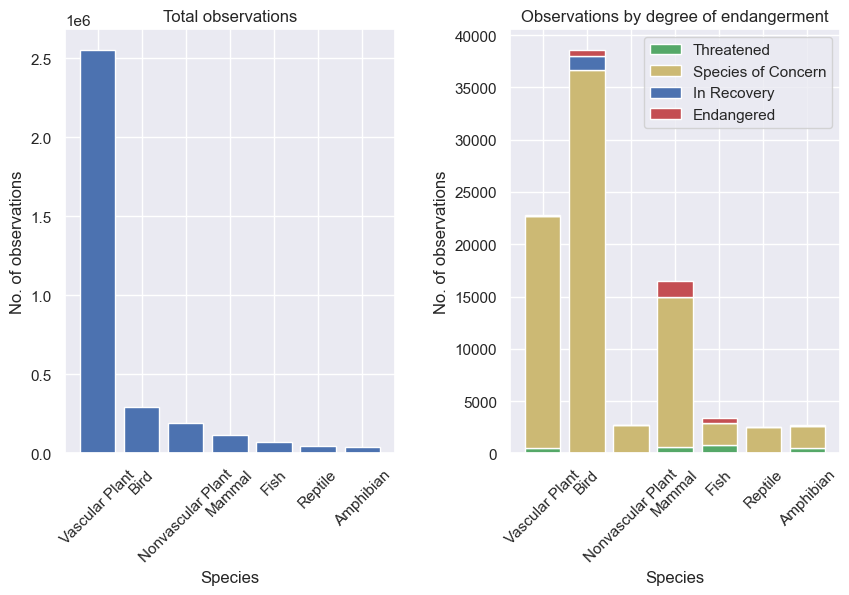

            category  Endangered  In Recovery  Species of Concern  Threatened
0     Vascular Plant        0.01         0.00                0.87        0.02
1               Bird        0.20         0.48               12.51        0.00
2  Nonvascular Plant        0.00         0.00                1.42        0.00
3             Mammal        1.25         0.00               12.35        0.50
4               Fish        0.64         0.00                2.98        1.17
5            Reptile        0.00         0.00                5.68        0.00
6          Amphibian        0.33         0.00                4.65        1.28


<Figure size 640x480 with 0 Axes>

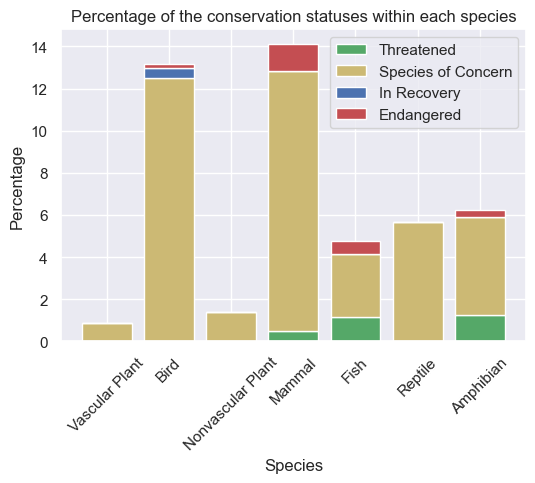

,category,percentage
0,Vascular Plant,77.082690
1,Bird,8.834270
2,Nonvascular Plant,5.751675
3,Mammal,3.520519
4,Fish,2.136458
5,Reptile,1.347859
6,Amphibian,1.326530


<Figure size 640x480 with 0 Axes>

In [82]:
# Total species
total = observations.groupby('category').observations.sum().reset_index().sort_values(by='observations', ascending=False).reset_index(drop=True)
total=pd.DataFrame(total)
print(total)
print(total.observations.sum())
observation_percent={}
observation_percent['category'] = total.category
observation_percent['percentage'] = total.observations/total.observations.sum()*100
observation_percent=pd.DataFrame(observation_percent)
print(observation_percent)

plt.figure(figsize=(10,8))

plt.subplot(1,2,1)
plt.bar(x=total['category'], height=total['observations'])
plt.xticks(rotation=45)
plt.xlabel('Species')
plt.ylabel('No. of observations')
plt.title('Total observations')


# Exclude observations of non concern
concerns = summary_pivot.drop('No Concern',axis=1)
concerns = concerns.reindex(list(total.category)).reset_index()
print(concerns)
plt.subplot(1,2,2)
plt.bar(concerns["category"],concerns["Threatened"],color='g')
plt.bar(concerns["category"],concerns["Species of Concern"],bottom = concerns["Threatened"],color='y')
plt.bar(concerns["category"],concerns["In Recovery"],bottom = concerns["Threatened"]+concerns["Species of Concern"],color='b')
plt.bar(concerns["category"],concerns["Endangered"],bottom = concerns["Threatened"]+concerns["Species of Concern"]+concerns["In Recovery"],color='r')
plt.xticks(rotation=45)
plt.xlabel('Species')
plt.ylabel('No. of observations')
plt.title('Observations by degree of endangerment')
plt.legend(["Threatened", "Species of Concern", "In Recovery", "Endangered"])
plt.subplots_adjust(wspace=0.35,bottom=0.35)
plt.savefig('Overview.png')
plt.show()
plt.clf()

# Proportions of the various conservation statuses within each species
con_percentage = {'category':list(concerns.category),'Endangered':[],'In Recovery':[],'Species of Concern':[],'Threatened':[]}
for i in range(7):
    con_percentage['Endangered'].append(round(concerns.Endangered[i]/total.observations[i]*100,2))
    con_percentage['In Recovery'].append(round(concerns['In Recovery'][i]/total.observations[i]*100,2))
    con_percentage['Species of Concern'].append(round(concerns['Species of Concern'][i]/total.observations[i]*100,2))
    con_percentage['Threatened'].append(round(concerns['Threatened'][i]/total.observations[i]*100,2))
con_percentag=pd.DataFrame(con_percentage)
print(con_percentag)

bottom1=con_percentage["Threatened"]
bottom2=np.add(bottom1,con_percentage["Species of Concern"])
bottom3=np.add(bottom2,con_percentage['In Recovery'])
plt.figure(figsize=(6,4))
plt.bar(con_percentage["category"],con_percentage["Threatened"],color='g')
plt.bar(con_percentage["category"],con_percentage["Species of Concern"],bottom = bottom1,color='y')
plt.bar(con_percentage["category"],con_percentage['In Recovery'],bottom=bottom2,color='b')
plt.bar(con_percentage["category"],con_percentage["Endangered"],bottom=bottom3, color='r')
plt.xticks(rotation=45)
plt.xlabel('Species')
plt.ylabel('Percentage')
plt.title('Percentage of the conservation statuses within each species')
plt.legend(["Threatened", "Species of Concern", "In Recovery", "Endangered"])
plt.savefig('proportions.png')
plt.subplots_adjust(bottom=0.1)
plt.show()
plt.clf()

total
con_percentag
observation_percent

- Species by conservation status

                              scientific_name  \
0                            Zizia trifoliata   
1            Camissonia sierrae ssp. alticola   
2                            Tofieldia glabra   
3                          Accipiter cooperii   
4    Dichanthelium acuminatum var. acuminatum   
..                                        ...   
755                          Eptesicus fuscus   
756                             Myotis leibii   
757                 Lasionycteris noctivagans   
758                             Sorex preblei   
759                       Melospiza lincolnii   

                               park_name  observations  \
0                 Yosemite National Park           135   
1                    Bryce National Park            84   
2    Great Smoky Mountains National Park            75   
3                    Bryce National Park            95   
4                 Yosemite National Park           123   
..                                   ...           ...   
755  

<Figure size 500x500 with 0 Axes>

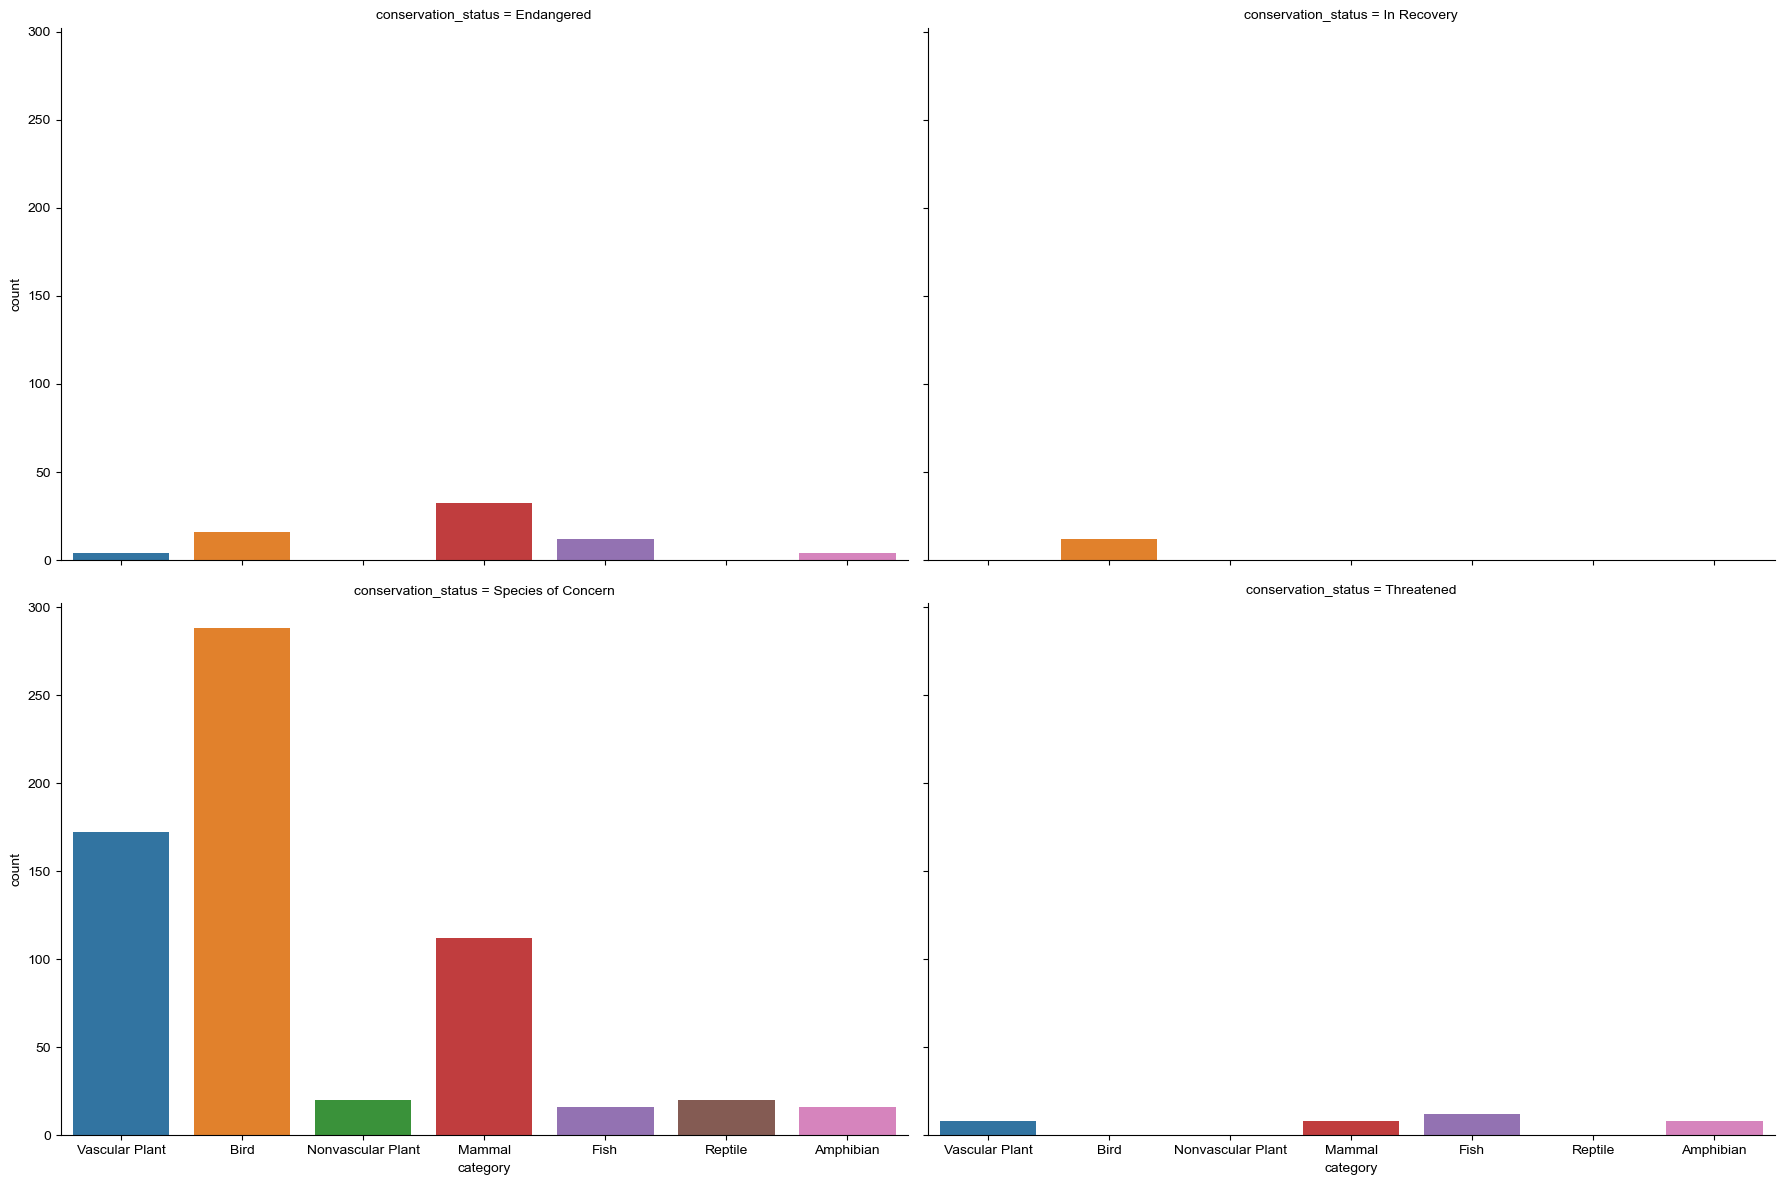

<Figure size 1000x800 with 0 Axes>

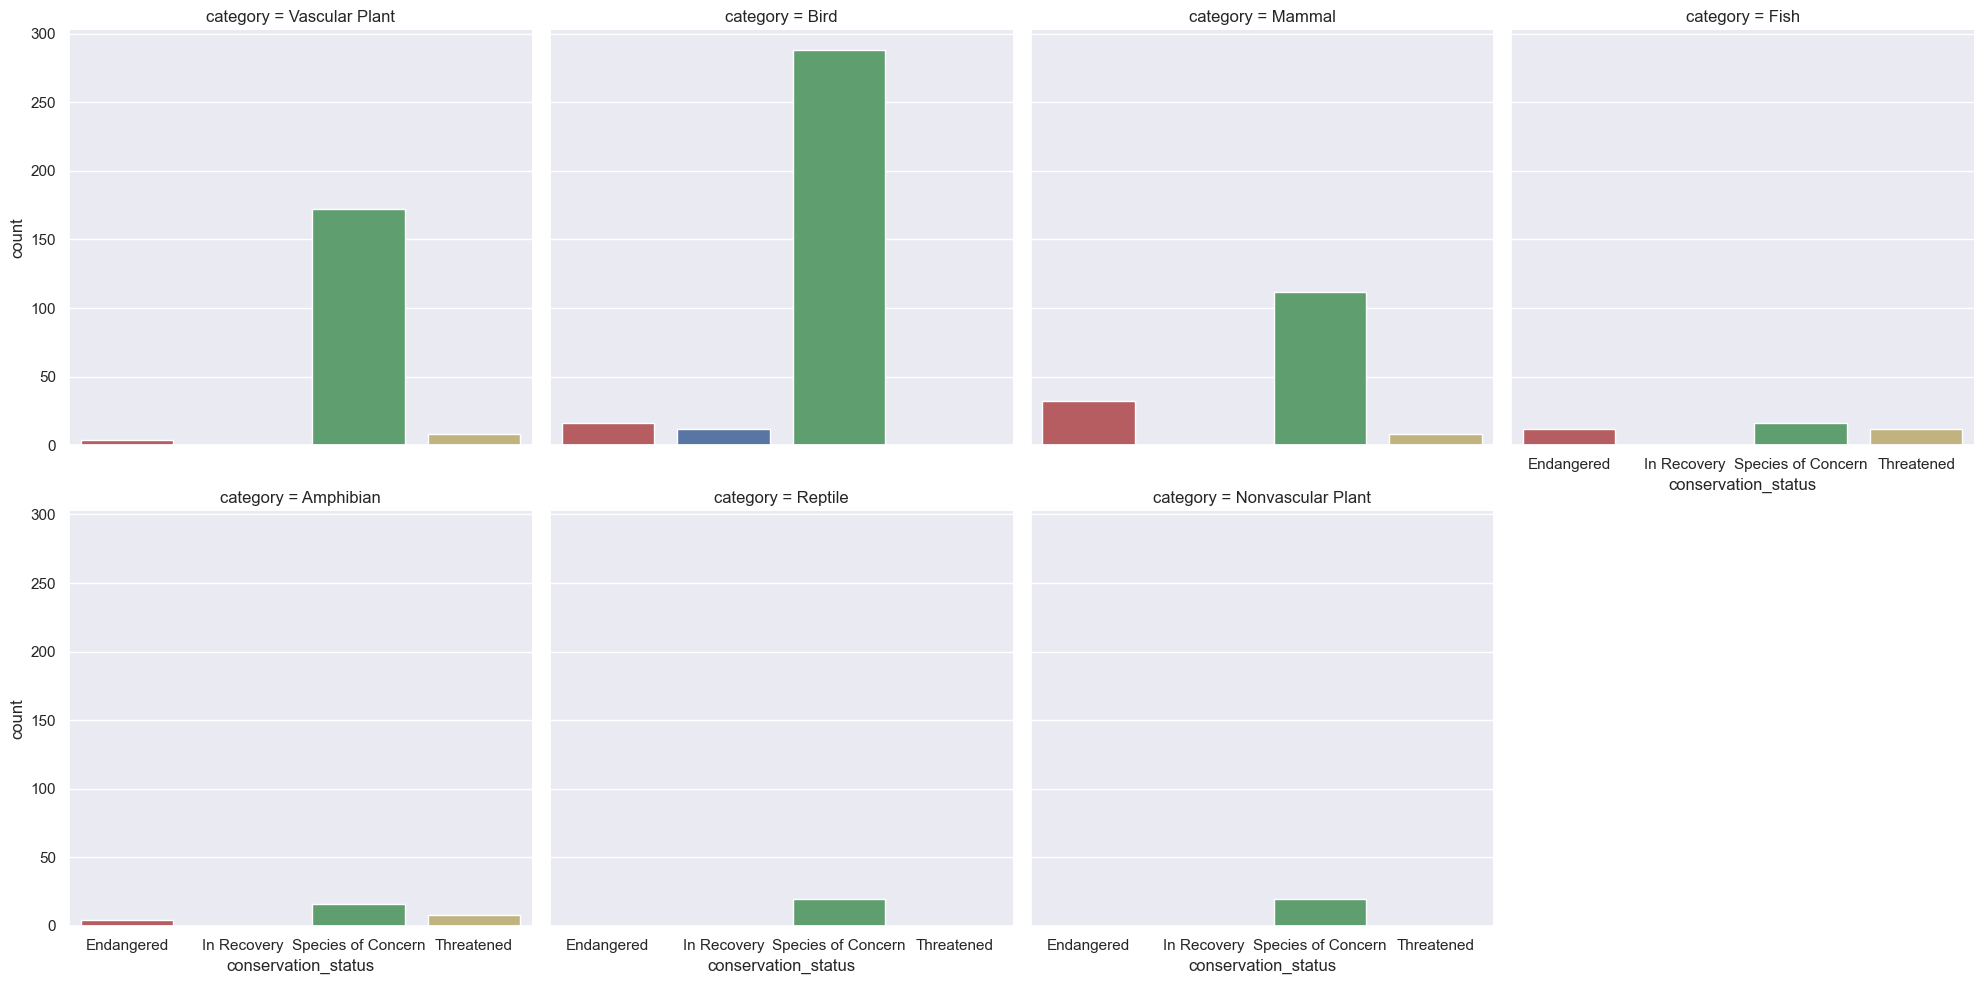

In [9]:
concerns_data = observations.dropna(subset='conservation_status', how='any').reset_index(drop=True)
print(concerns_data)

plt.figure(figsize=(5,5))

fig1 = sns.catplot(x="category", col="conservation_status",
                data=concerns_data, kind="count",
                height=6, aspect=1.5,col_wrap=2,col_order=['Endangered','In Recovery','Species of Concern','Threatened'],order=list(concerns.category))
#plt.xticks(rotation=45)
sns.set(font_scale=1)
plt.savefig('Species by conservation status 1.png')

plt.figure(figsize=(10,8))
fig2=sns.catplot(x="conservation_status", col="category",
                     data=concerns_data, 
                     kind="count", 
                     order=['Endangered','In Recovery','Species of Concern','Threatened'],
                     palette=['r','b','g','y'],col_wrap=4)
sns.set(font_scale=1)
plt.savefig('Species by conservation status 2.png')


print(concerns_data.conservation_status.unique())